# Gmarket
- 베스트 상품 200개 데이터 수집
- 상품의 이미지 200개 다운로드

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

## 1. URL 찾기

In [3]:
url = "https://www.gmarket.co.kr/n/best"

## 2. request > response : str(html)

In [5]:
headers = {
    "user-agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/128.0.0.0 Safari/537.36}",
    "cookie": "cguid=11692834805054007282000000; pguid=21692834805054007282010000; _ga=GA1.1.1161005941.1692834805; _fbp=fb.2.1719115721884.615731559340228277; ssguid=317193236808540050222000001; cto_bundle=pjB5CF8zYm9XbnNQbUlaOFUlMkJwN01pTCUyQnVWNFZRSFlnTmxOR2VxOE1ydWhKakh2QlJVUlkyVCUyQjA0M01RempyUEJ1YlpVTkVBM1dlbU1JcUZvZm1YeXRZb2NmUHBIOVltUDYycUdoMHIlMkZRdWFXNXJsYm84ZG5wZjgyaHgyNSUyQjExRVcxeGk1b1o0eSUyQmY3cDVyMGZsRHlISjMxUFRCUjRnNXQ4eEp6dzZQQSUyRmJhZ3NCYkxwbDgxNHlldVZQTnolMkZDaWc0UXBDYktuU2ZJVkM4eWs1S1BsJTJGOTVkS0RBJTNEJTNE; cosemkid=go16896720596496759; sguid=31726057665311003902000000; jaehuid=200011415; kwid=go16896720596496759; lnd_kwd=undefined; 9b5ac327653ddb71c4abb11d9b645ca3=390b294f1eed65b818f6d1177a701b03; __cf_bm=RJht6qdSBowPUckCBA.8MSclapX6zPgWdKJ45zHoeZ8-1726057665-1.0.1.1-iBv.lnRdht5mYraUyjQTQGyKTFX_gkRm.QDdI7frbEtvsuLX2evhbTXrCTyN6E.T7PD8S7I72g4LRJRSRH0FWA; _cfuvid=aaY9BfpM5rvN.3ZUD5nt7iAZpBbTJb6iGJxJavKf7Hg-1726057665717-0.0.1.1-604800000; cf_clearance=RLF2lhh6L6G7PsvSFHSNgUjEe7VatMd62vz_FbDU1Os-1726057666-1.2.1.1-kSWCVLrqgiAPLGdmunY_iEEqjiVoHxYlHntTUDTiUjAQkR2U4FQVHD7oDHcEsvVXqFpmje5Y_qaOao.8fRC60uEfwiM67nyEgGqAGyzgO8oQWS9Bqw.hCJxcQ_QYwKzSvctbIhhgWiHhrYDphFaeMlAN632EsdS09BAQPCqkj.W_LqLjpfYQoiuk4BrmFBhsJ5m.PYxeJnKqJlLMhiw9txZJKu5HYRHSsF5Yq60t7UeGxcWAODcKiBP70aSUkFUGsCJ687K7bWy55dldd3usxS1KkLnSLJVCovAaJY8yyn0AruYMzSDMPut0RFrgOhlA0.wMHr_2hw6QUpUBqZTzKIVgXTOzYa2YhbyxN4Jy4tL.qhJQrd5vGY9mz1wVNx2q.jHtOqLD3naE9lxYPb.xYQ; mont_fph=0c0a76079cf91dd7d71e471d136f51a4; __rtbh.uid=%7B%22eventType%22%3A%22uid%22%2C%22id%22%3A%22JYa1piIXSBFJ%2Bwd9V1ZVRV0KTONUIfPbTQCocsnUmGA%3D%22%7D; __rtbh.lid=%7B%22eventType%22%3A%22lid%22%2C%22id%22%3A%2241M6xWHcVjVApxjrxbBx%22%7D; _gcl_gs=2.1.k1$i1726057663; mtguid=Pioqzfndoxcjwugaiijpyexnyzr1726057668872; _gcl_aw=GCL.1726057667.CjwKCAjw_4S3BhAAEiwA_64YhmpZtC4YtP8z3n2z8-b7q756ag7NX-NxTQNJssex2sTSxTz8L53VixoCmroQAvD_BwE; 6361c5a58da80370cd396c77654e6153=0b6f9bacabed184de5db39e48df805aa; _ga_1BYVQK09SB=GS1.1.1726057664.7.1.1726057746.46.0.0; mont_fpt=1726057746701",
    "accept-language": "ko-KR,ko;q=0.9,en-US;q=0.8,en;q=0.7",
    "sec-ch-ua-platform": "macOS",
}    
response = requests.get(url, headers=headers)
response

<Response [200]>

## 3. bs > DataFrame

In [7]:
dom = BeautifulSoup(response.text, "html.parser")

In [8]:
# select items
elements = dom.select("#container > div.box__best-list > ul > li")
len(elements)

200

In [9]:
element = elements[1]

In [10]:
# select item data
item = {
    "title": element.select_one(".box__item-title").text,
    "link": element.select_one("a").get("href"),
    "img": "https:" + element.select_one("img").get("src"),
    "s_price": element.select_one(
        ".box__price-seller > .text__value").text,
}
try:
    item["o_price"] = element.select_one(
        ".box__price-original > .text__value").text
except:
    item["o_price"] = None
item

{'title': '(빽다방) 디지털 금액권 1만원권',
 'link': 'http://item.gmarket.co.kr/Item?goodscode=4113465600&ver=20240911',
 'img': 'https://gdimg.gmarket.co.kr/4113465600/still/300?ver=1724905130',
 's_price': '8,900',
 'o_price': '10,000'}

In [11]:
# make DataFrame
items = []

for element in elements:
    item = {
        "title": element.select_one(".box__item-title").text,
        "link": element.select_one("a").get("href"),
        "img": "https:" + element.select_one("img").get("src"),
        "s_price": element.select_one(
            ".box__price-seller > .text__value").text,
    }
    try:
        item["o_price"] = element.select_one(
            ".box__price-original > .text__value").text
    except:
        item["o_price"] = None
    items.append(item)
    
df = pd.DataFrame(items)
df.tail(2)

,title,link,img,s_price,o_price
198,(신선집중) NH카드/ 새코롬 감귤 고당도 비가림 하우스감귤 2.5kg 로얄과,http://item.gmarket.co.kr/Item?goodscode=26151...,https://gdimg.gmarket.co.kr/2615106227/still/3...,"18,900","21,000"
199,(4800원/ 무료배송)리바이스 스테디셀러 드로즈 시리즈,http://item.gmarket.co.kr/Item?goodscode=40007...,https://gdimg.gmarket.co.kr/4000728540/still/3...,"6,000","20,000"


In [12]:
# 데이터 전처리
df1 = df.copy()
none_idx = df1[df1['o_price'].isnull()].index
df1.loc[none_idx, 'o_price'] = df1['s_price']
df1.tail(2)

,title,link,img,s_price,o_price
198,(신선집중) NH카드/ 새코롬 감귤 고당도 비가림 하우스감귤 2.5kg 로얄과,http://item.gmarket.co.kr/Item?goodscode=26151...,https://gdimg.gmarket.co.kr/2615106227/still/3...,"18,900","21,000"
199,(4800원/ 무료배송)리바이스 스테디셀러 드로즈 시리즈,http://item.gmarket.co.kr/Item?goodscode=40007...,https://gdimg.gmarket.co.kr/4000728540/still/3...,"6,000","20,000"


## 4. Download Image

In [14]:
# make directory
import os

if not os.path.exists("data"):           
    os.makedirs("data")

In [15]:
%ls data

000.png   001.png   002.png   003.png   004.png   test.png


In [16]:
img_link = df.loc[0, "img"]
print(img_link)

https://gdimg.gmarket.co.kr/3580541703/still/300?ver=1725845882


In [17]:
# download image

In [18]:
response = requests.get(img_link)
response

<Response [200]>

In [19]:
with open("data/test.png", "wb") as file:
    file.write(response.content)

In [20]:
%ls data

000.png   001.png   002.png   003.png   004.png   test.png


In [21]:
from PIL import Image as pil

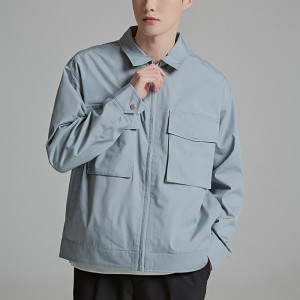

In [22]:
pil.open("data/test.png")

In [23]:
# 5개의 아이템 이미지 다운로드
for idx, data in df[:5].iterrows():
    filename = "0" * (3 - len(str(idx))) + str(idx)
    print(idx, end=" ")
    response = requests.get(data.img)
    with open(f"data/{filename}.png", "wb") as file:
        file.write(response.content)

0 1 2 3 4 

In [24]:
%ls data

000.png   001.png   002.png   003.png   004.png   test.png


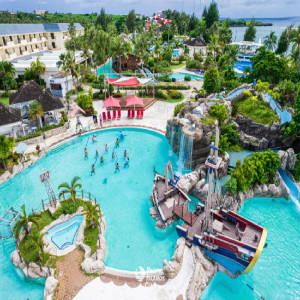

In [25]:
pil.open("data/002.png")